In [12]:
import yt
import numpy as np
import trident as tri
import h5py
from importlib import reload


In [19]:
try:
    rayh5 = h5py.File("test_rays/0000ray.h5")
except OSError:
    print("couldn't open try agian later")

In [20]:
yt.load("test_rays/0000ray.h5")
rayh5['grid']

yt : [INFO     ] 2019-05-28 16:37:56,658 Parameters: current_time              = 0.0060000200028298 code_time
yt : [INFO     ] 2019-05-28 16:37:56,659 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-05-28 16:37:56,659 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-05-28 16:37:56,661 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-05-28 16:37:56,662 Parameters: cosmological_simulation   = 0.0


<HDF5 group "/grid" (20 members)>

In [28]:
filename = "~/Repo/yt/doc/source/quickstart/IsolatedGalaxy/galaxy0030/galaxy0030"

In [29]:
! ls /home/bb/Repo/yt/doc/source/quickstart/

'1)_Introduction.ipynb'			  derived_fields_and_profiles.rst
'2)_Data_Inspection.ipynb'		  Enzo_64
'3)_Simple_Visualization.ipynb'		  enzo_tiny_cosmology
'4)_Data_Objects_and_Time_Series.ipynb'   index.rst
'5)_Derived_Fields_and_Profiles.ipynb'	  introduction.rst
'6)_Volume_Rendering.ipynb'		  IsolatedGalaxy
 data_inspection.rst			  simple_visualization.rst
 data_objects_and_time_series.rst	  volume_rendering.rst


In [30]:
ds = yt.load(filename)

ray_start= np.array([0.4, 0, 0.45], dtype=float)
ray_end = np.array([0.4, 0.8, 0.45], dtype=float)

ray = ray_end - ray_start
line_list = ['O VI', 'H I', 'C IV']
norm_vec = [ray[1], -1*ray[0], 0]

yt : [INFO     ] 2019-05-28 10:50:23,558 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2019-05-28 10:50:23,559 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-05-28 10:50:23,560 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-28 10:50:23,562 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-28 10:50:23,563 Parameters: cosmological_simulation   = 0.0


In [31]:
ds.field_list

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 11161.07it/s]
yt : [INFO     ] 2019-05-28 10:51:23,963 Gathering a field list (this may take a moment.)


[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

## coding up ray

In [13]:
tri.add_ion_fields(ds, ions=line_list, ftype='gas')

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 5153.55it/s]
yt : [INFO     ] 2019-05-28 10:37:01,803 Gathering a field list (this may take a moment.)
yt : [WARNING  ] 2019-05-28 10:37:03,226 Field ('gas', 'H_p0_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-28 10:37:03,227 Field ('gas', 'H_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-28 10:37:03,228 Field ('gas', 'H_p0_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-28 10:37:03,228 Field ('gas', 'H_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-28 10:37:03,229 Field ('gas', 'H_p0_mass') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-28 10:37:03,229 Field ('gas', 'H_mass') already exists. Not clobbering.


In [14]:
ray_start =ds.arr(ray_start, "code_length")
ray_end = ds.arr(ray_end, "code_length")
tri_ray = tri.make_simple_ray(ds,
                              start_position = ray_start,
                              end_position = ray_end,
                              lines = line_list,
			      ftype = 'gas')


yt : [INFO     ] 2019-05-28 10:37:10,316 Getting segment at z = 0.0: [0.4  0.   0.45] unitary to [0.4  0.8  0.45] unitary.
/home/bb/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1394: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)
yt : [INFO     ] 2019-05-28 10:37:10,322 Getting subsegment: [0.4 unitary, 0.0 unitary, 0.45 unitary] to [0.4 unitary, 0.8 unitary, 0.45 unitary].
yt : [INFO     ] 2019-05-28 10:37:10,475 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2019-05-28 10:37:10,679 Parameters: current_time              = 0.0060000200028298 code_time
yt : [INFO     ] 2019-05-28 10:37:10,680 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-05-28 10:37:10,681 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-05-28 10:37:10,682 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-05-28 10:37:10,683 Parameters: cosmological_simulation   = 0.0


In [21]:
tri_ray.all_data()['H']

YTArray([1.20546875e+24, 1.20546875e+24, 1.20546875e+24, 1.20546875e+24,
         1.20546875e+24, 1.20546875e+24, 1.20546875e+24, 1.22957812e+24,
         1.22957812e+24, 1.22957812e+24, 1.22957812e+24, 1.24163281e+24,
         1.24163281e+24, 1.24163281e+24, 1.24163281e+24, 1.24163281e+24,
         1.24163281e+24, 1.24163281e+24, 1.23560547e+24, 1.23560547e+24,
         1.23560547e+24, 1.23560547e+24, 1.23560547e+24, 1.23560547e+24,
         1.23560547e+24, 1.23560547e+24, 1.23560547e+24, 1.23560547e+24,
         1.23560547e+24, 1.23560547e+24, 1.23560547e+24, 1.23560547e+24,
         1.23560547e+24, 1.23560547e+24, 1.23560547e+24, 1.23560547e+24,
         1.23560547e+24, 1.23560547e+24, 1.23560547e+24, 1.23560547e+24,
         1.23560547e+24, 1.23560547e+24, 1.23560547e+24, 1.23560547e+24,
         1.23560547e+24, 1.23560547e+24, 1.23560547e+24, 1.23560547e+24,
         1.23560547e+24, 1.23560547e+24, 1.23560547e+24, 1.23560547e+24,
         1.23560547e+24, 1.23560547e+24, 1.23560547

In [7]:
rr = yt.load('ray.h5')

yt : [INFO     ] 2019-05-24 09:35:28,791 Parameters: current_time              = 0.0060000200028298 code_time
yt : [INFO     ] 2019-05-24 09:35:28,792 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-05-24 09:35:28,792 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-05-24 09:35:28,793 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-05-24 09:35:28,794 Parameters: cosmological_simulation   = 0.0


In [8]:
x=1
if (x == 1):
    raise RuntimeError('boop')

RuntimeError: boop

In [9]:
spx = yt.SlicePlot(ds, 'x', 
                   'C_p3_density', 
                   center = [0.5, 0.5, 0.5],
                   width= (1))
spx.annotate_ray(tri_ray, arrow=True)
spx.save("xSlice.png")

yt : [INFO     ] 2019-05-24 09:35:35,994 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:35:35,995 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:35:35,995 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:35:35,996 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:35:35,997 Making a fixed resolution buffer of (('gas', 'C_p3_density')) 800 by 800
yt : [INFO     ] 2019-05-24 09:35:36,760 Saving plot xSlice.png


['xSlice.png']


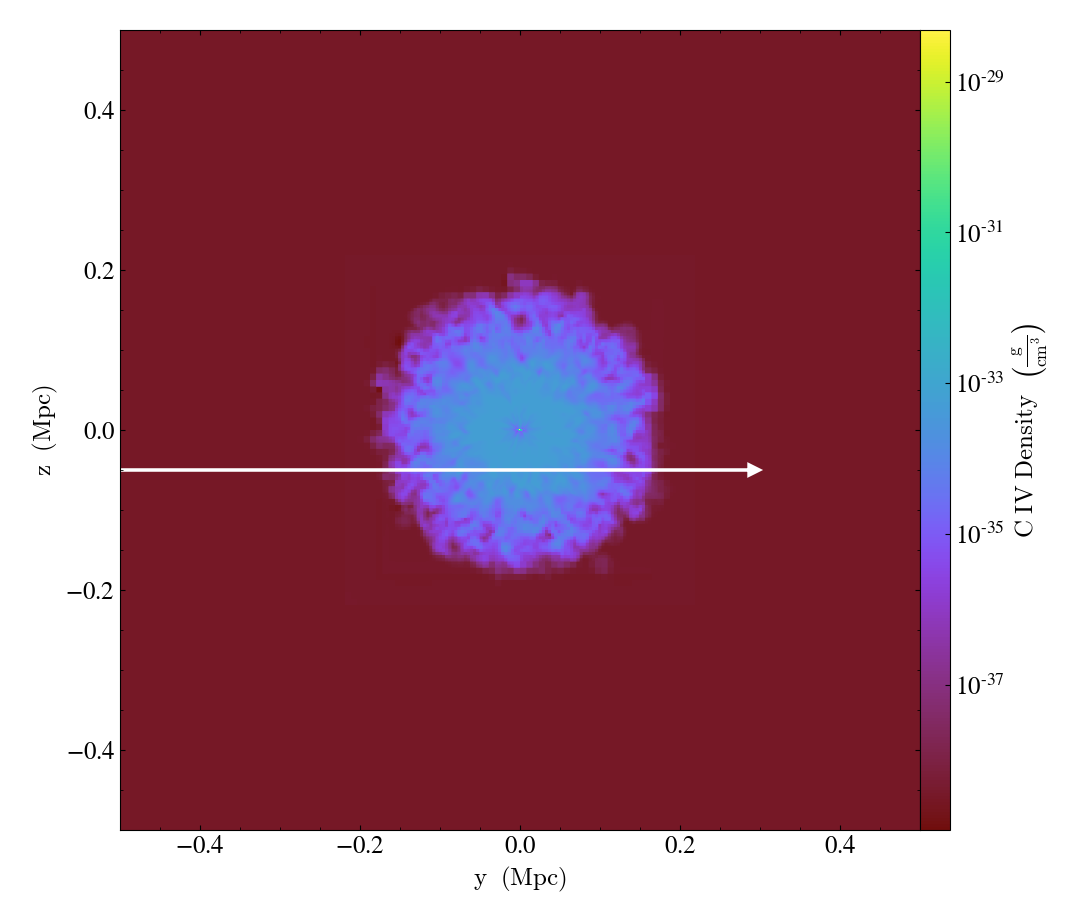

In [10]:
spx


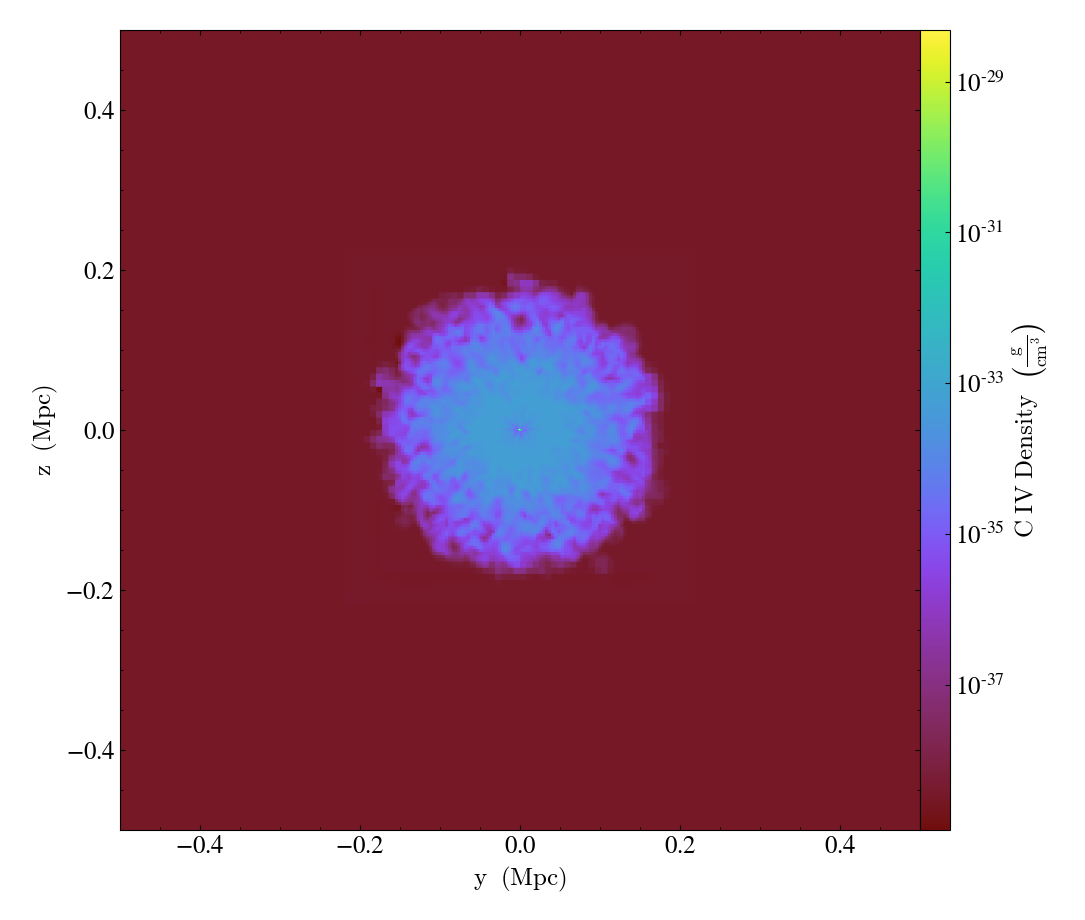

In [11]:
spx.annotate_clear()
spx

In [12]:
#want norm vector that would give same result as x-axis slice
center = (ray_end + ray_start)/2
center[2]=0.5
sp_me= yt.SlicePlot(ds, norm_vec, 'density', 
                    center = center, 
                    north_vector=[0,0,1],
                    width= (1))
sp_me.annotate_ray(tri_ray)
sp_me.save("slice.png")

yt : [WARNING  ] 2019-05-24 09:35:43,158 Ignoring 'north_vector' keyword as it is ill-defined for an AxisAlignedSlicePlot object.
yt : [INFO     ] 2019-05-24 09:35:43,181 xlim = -0.100000 0.900000
yt : [INFO     ] 2019-05-24 09:35:43,182 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:35:43,186 xlim = -0.100000 0.900000
yt : [INFO     ] 2019-05-24 09:35:43,191 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:35:43,193 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/home/bb/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1394: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)
yt : [INFO     ] 2019-05-24 09:35:43,467 Saving plot slice.png


['slice.png']

In [13]:
norm_vec

[0.8, -0.0, 0]

In [14]:
center

YTArray([0.4, 0.4, 0.5]) unitary

In [15]:
sg = tri.SpectrumGenerator('COS-G130M')
spect = sg.make_spectrum(tri_ray, lines=line_list)

#s =sg.plot_spectrum('spec_raw.png')

yt : [INFO     ] 2019-05-24 09:35:45,403 Setting instrument to COS-G130M
yt : [INFO     ] 2019-05-24 09:35:45,457 Allocating for 1.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2019-05-24 09:35:45,463 Identified 7.300e+01 octs
yt : [INFO     ] 2019-05-24 09:35:45,677 Creating spectrum
yt : [INFO     ] 2019-05-24 09:35:45,708 12 out of 112 line components will be deposited as unresolved lines.
Adding line - O VI 1038 [1037.613000 A]: : 100%|██████████| 112/112 [00:00<00:00, 3734.52it/s]
yt : [INFO     ] 2019-05-24 09:35:45,743 13 out of 112 line components will be deposited as unresolved lines.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 112/112 [00:00<00:00, 3354.05it/s]
yt : [INFO     ] 2019-05-24 09:35:47,262 Not adding continuum Ly C: insufficient column density or out of range


In [16]:
sg.save_spectrum("spect.h5")

yt : [INFO     ] 2019-05-24 09:35:50,151 Writing spectrum to hdf5 file: spect.h5.


In [17]:
def ion_p_name(ion):
    return ion.split()[0]+'_p'+str(tri.from_roman(ion.split()[1])-1)

i = 'C IV'
ion_p_name(i)

'C_p3'

In [18]:
import h5py

In [19]:
ray = h5py.File("ray.h5")
i.split?

In [20]:
ray["grid"]['dl']

<HDF5 dataset "dl": shape (112,), type "<f8">

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
y = np.array([2, 4, 6, 8, 10])

In [23]:
x = np.arange(0, 5)

In [28]:
import h5py

In [29]:
s = h5py.File('ray.h5')

In [32]:
from os import system

In [33]:
print(system("touch x"))


0


In [34]:
! ls


class_combined_H.png		plot_slice_ndpl_spectra.py	spec_raw.png
class_comb.png			plot_slice_ndpl_spectra.pyc	spect.h5
class_playground.ipynb		plotter.py			test_images
combined_plot.png		plotter.pyc			test_rays
galaxy0030_Slice_x_density.png	__pycache__			tt.png
his_Slice_x_density.png		ray.h5				Untitled.ipynb
multiplot_C.png			slice_and_ray_playground.ipynb	x
notes.txt			slice_and_ray.py		xSlice_nope.png
OHC2.h5				slice_nope.png			xSlice.png
OHC.h5				slice.png
plot_slice_ndpl_spectra0.py	spec_raw_nope.png


In [35]:
from os import remove

In [36]:
remove('x')

In [37]:
frb = spx.frb

In [38]:
from matplotlib.colors import LogNorm

yt : [INFO     ] 2019-05-24 09:36:02,765 Making a fixed resolution buffer of (density) 800 by 800


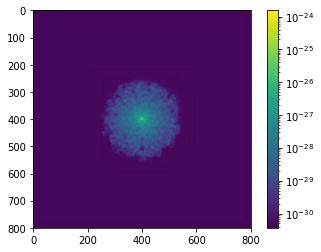

In [39]:
plt.imshow(np.array(frb['density']), norm=LogNorm())
plt.colorbar()


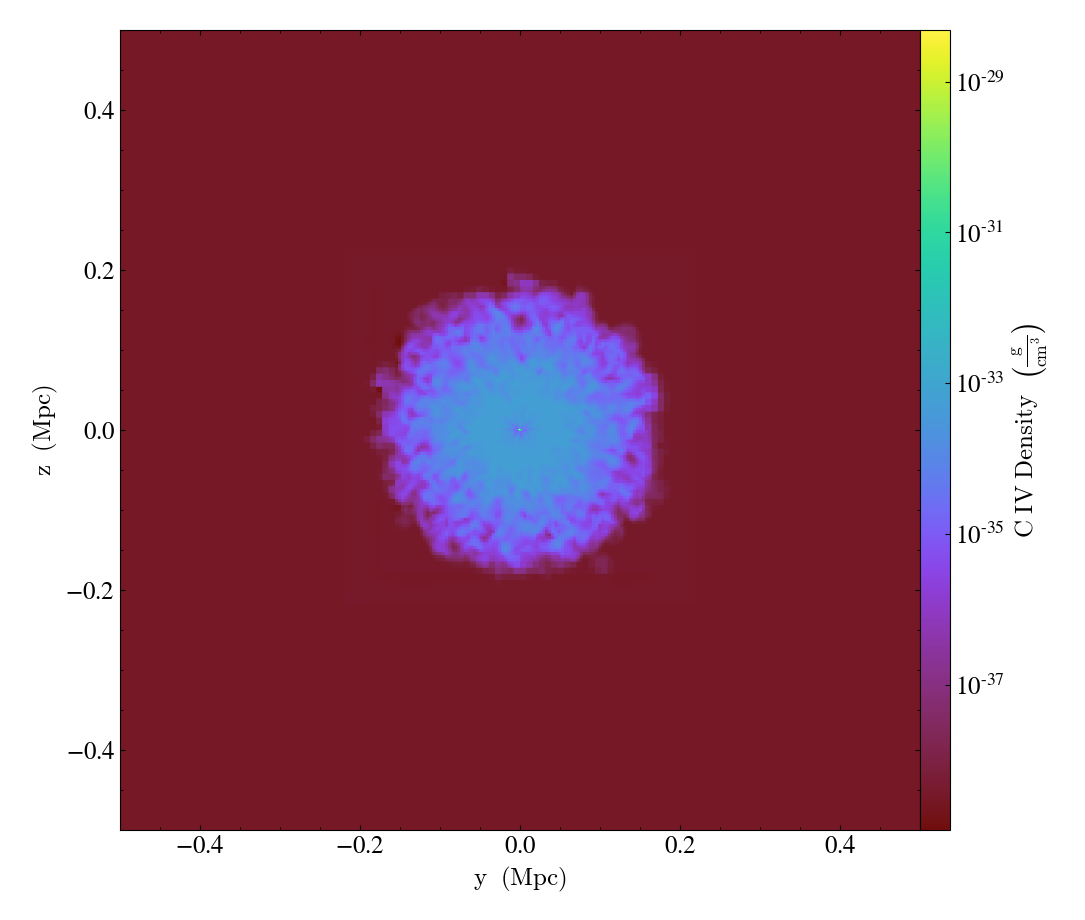

In [40]:
spx

In [45]:
width = (1, 'Mpc') # we want a 1.5 mpc view
res = [1000, 1000] # create an image with 1000x1000 pixels
frb = cut.to_frb(width, res)

In [46]:
frb

yt : [INFO     ] 2019-05-24 09:36:14,217 Making a fixed resolution buffer of (density) 1000 by 1000


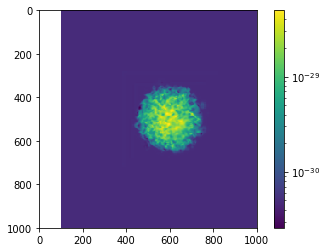

In [47]:
plt.imshow(np.array(frb['density']), norm=LogNorm())
plt.colorbar()


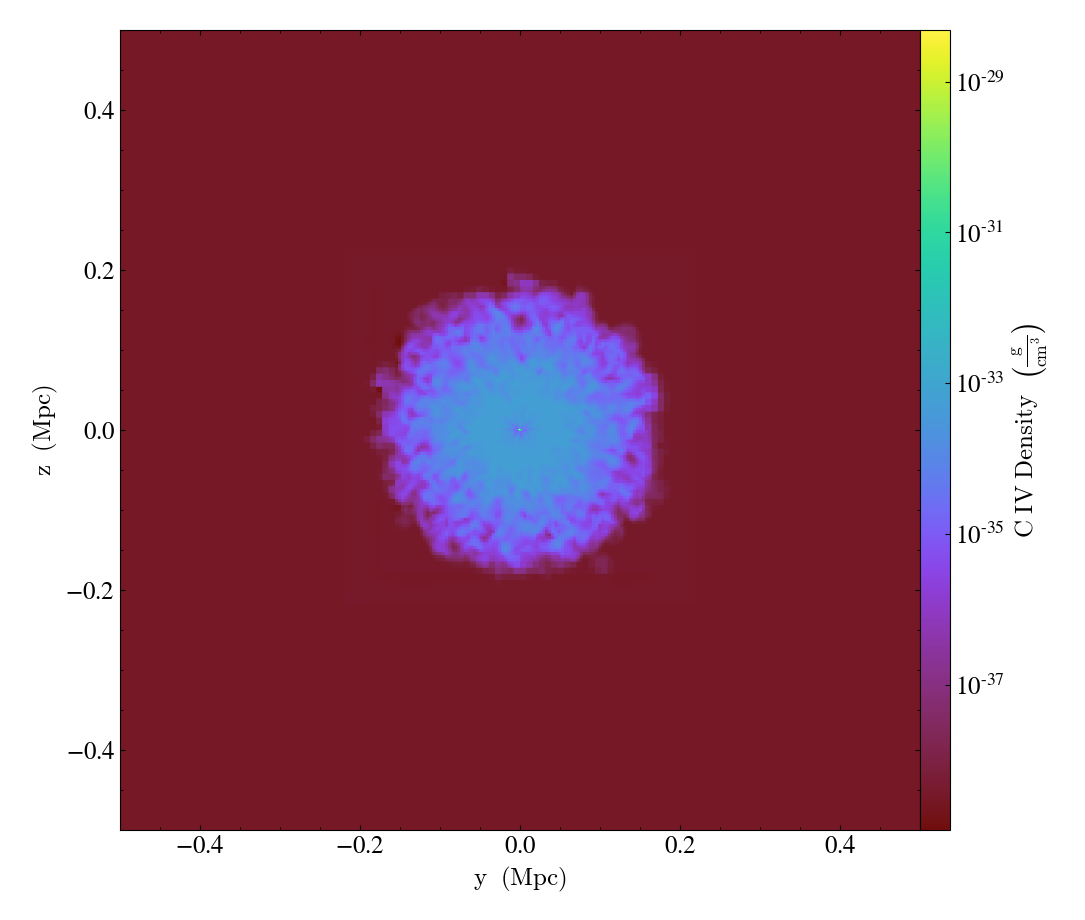

In [48]:
spx

In [49]:
from mpl_toolkits.axes_grid1 import AxesGrid

yt : [INFO     ] 2019-05-24 09:36:15,353 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:36:15,355 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:36:15,357 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:36:15,358 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:36:15,359 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/home/bb/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1394: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)



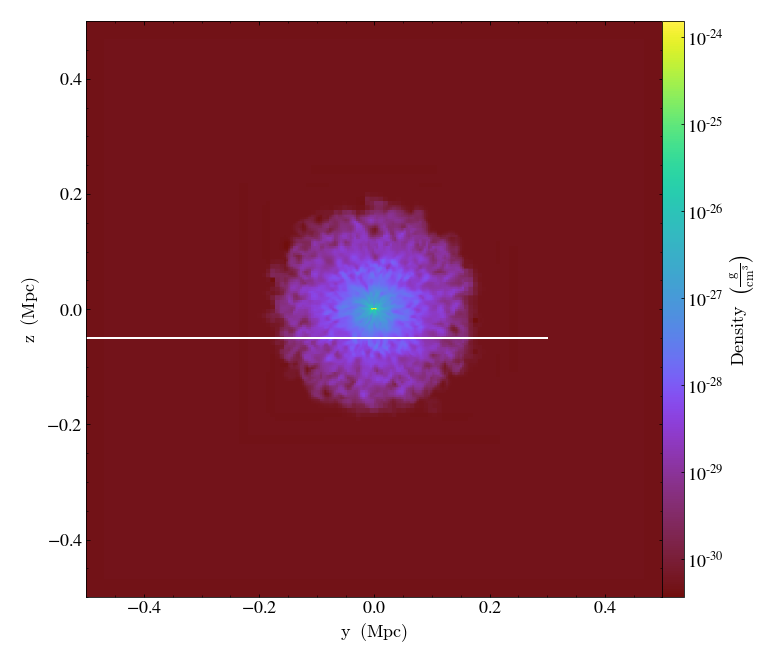

In [50]:
spx = yt.SlicePlot(ds, 'x', 
                   'density', 
                   center = [0.5, 0.5, 0.5],
                   width= (1))
spx.annotate_ray(tri_ray)

/home/bb/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1394: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)


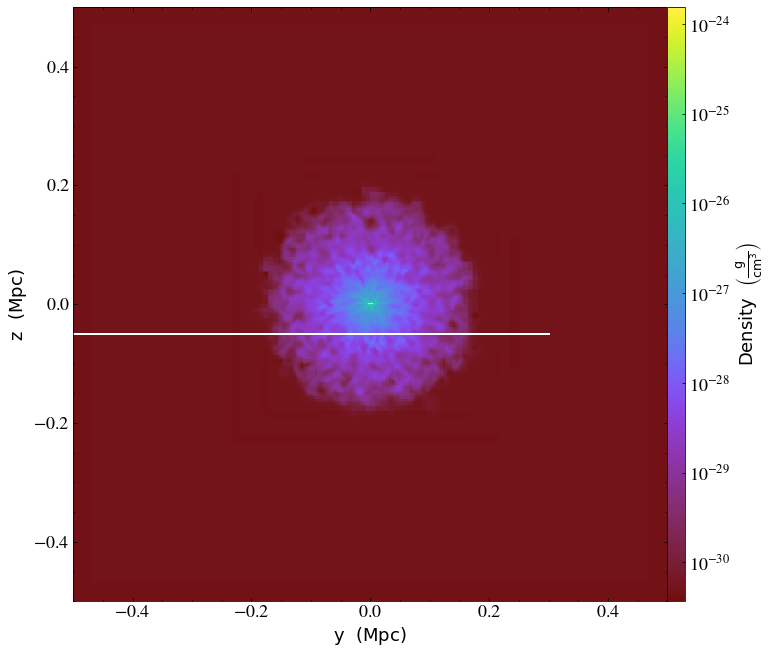

In [51]:
import yt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

fig1 = plt.figure(figsize=(10, 10))

# See http://matplotlib.org/mpl_toolkits/axes_grid/api/axes_grid_api.html
# These choices of keyword arguments produce a four panel plot that includes
# four narrow colorbars, one for each plot.  Axes labels are only drawn on the
# bottom left hand plot to avoid repeating information and make the plot less
# cluttered.
grid = AxesGrid(fig1, (0.075,0.075,0.85,0.85),
                nrows_ncols = (1, 1),
                axes_pad = 1.0,
                label_mode = "L",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")

fields = ['density']

# Create the plot.  Since SlicePlot accepts a list of fields, we need only
# do this once.
p = spx

# Velocity is going to be both positive and negative, so let's make these
# slices use a linear colorbar scale
p.set_log('velocity_x', False)
p.set_log('velocity_y', False)


# For each plotted field, force the SlicePlot to redraw itself onto the AxesGrid
# axes.
for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]



# Finally, redraw the plot on the AxesGrid axes.
p._setup_plots()

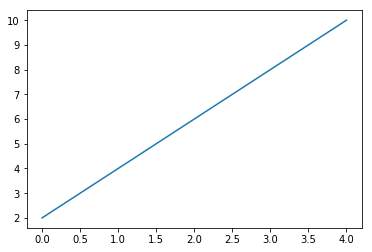

In [52]:
ax = fig1.add_subplot(222)
plt.plot(x, y)

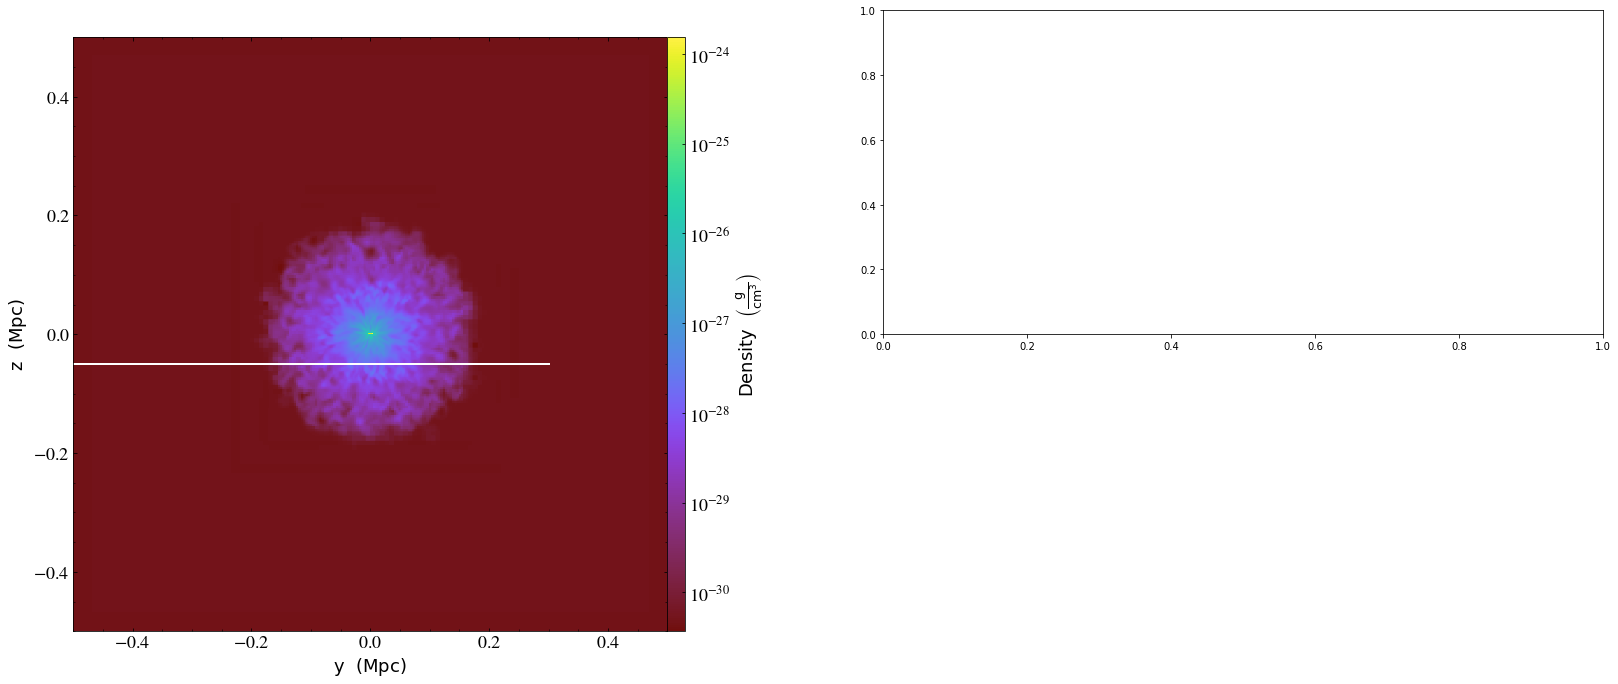

In [53]:
ax.set_position([1.2, 0.5, 1, 0.45])
fig1

In [54]:
ax2 = fig1.add_subplot(224)
ax2.plot(x, y)


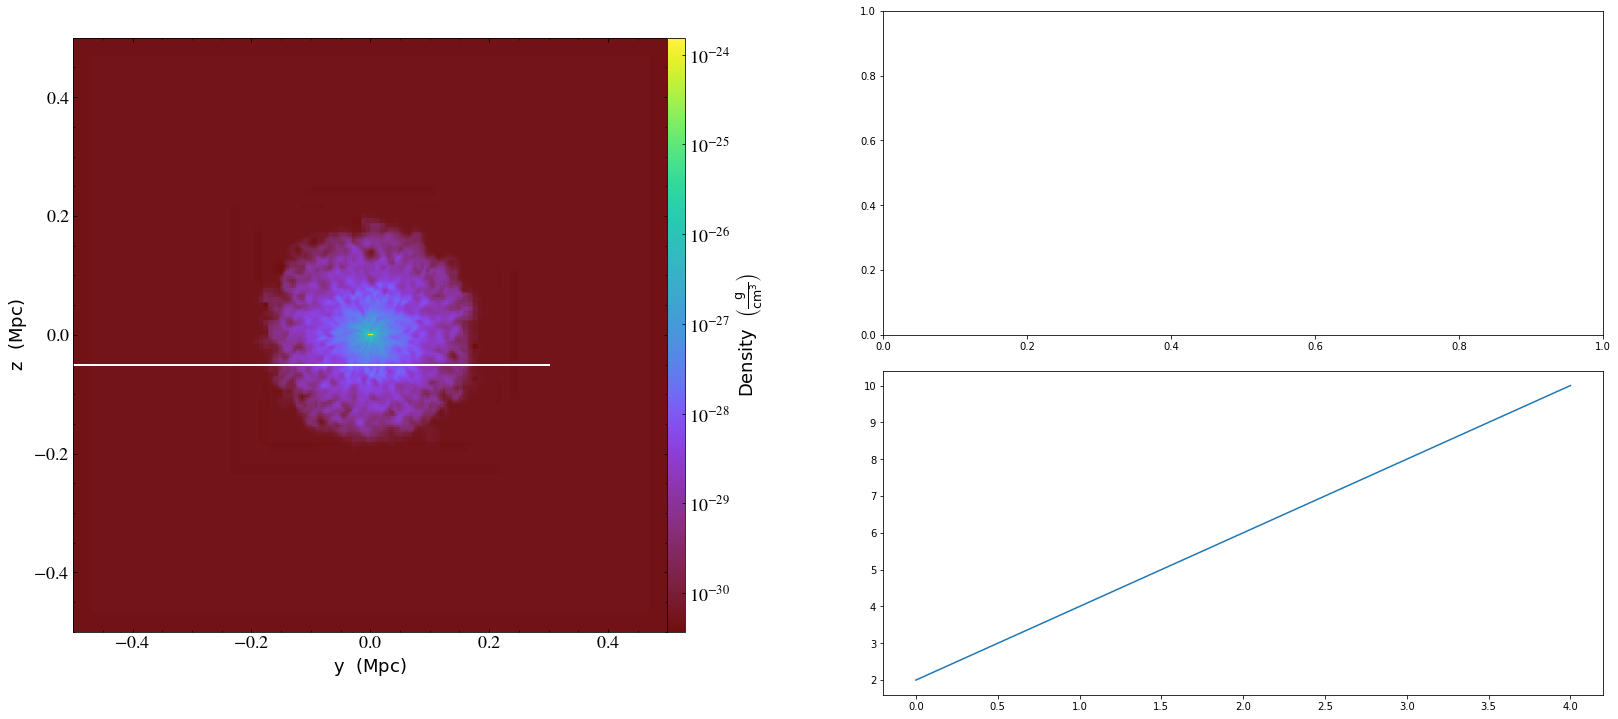

In [55]:
ax2.set_position([1.2, 0, 1, 0.45])
fig1

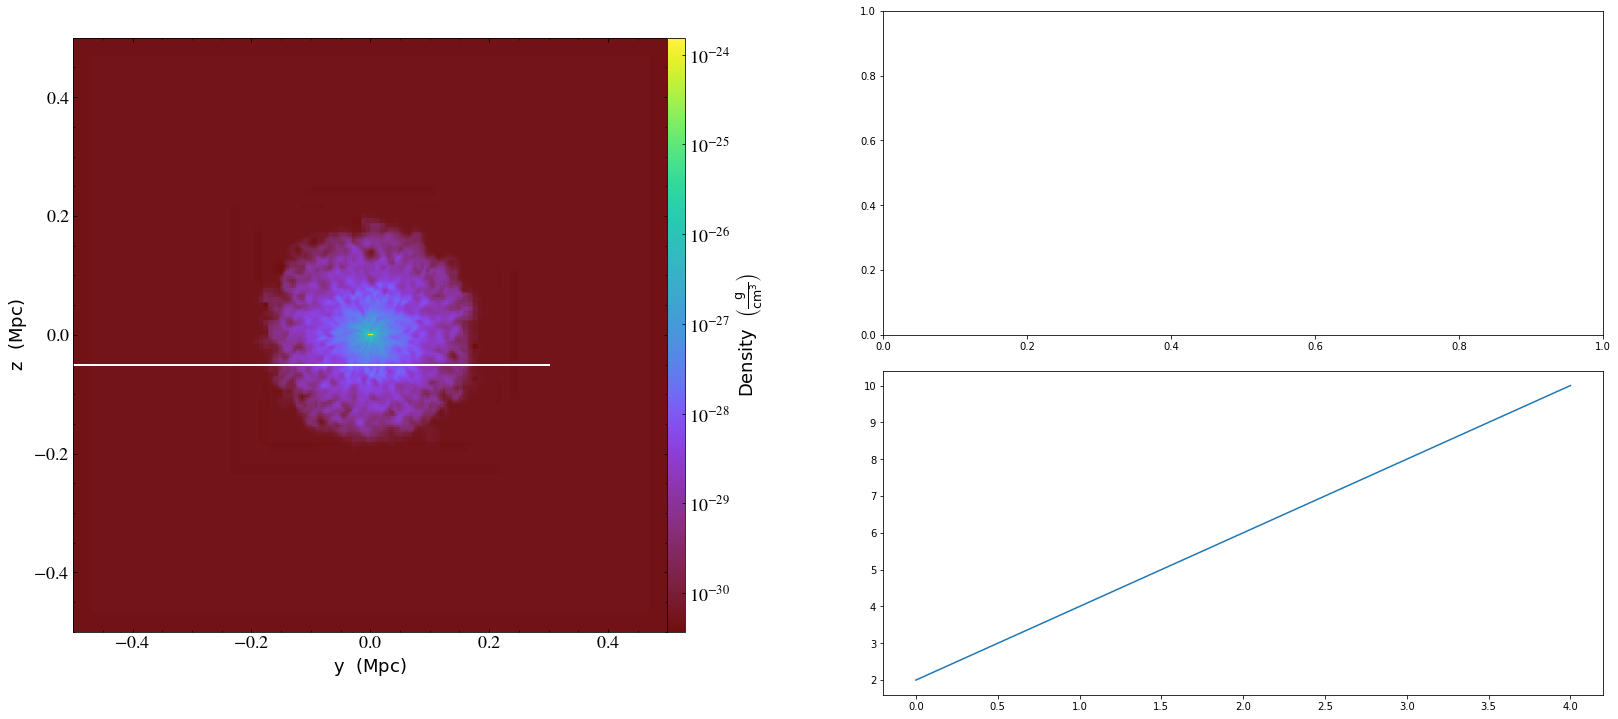

In [56]:
fig1

In [57]:
fig1.savefig('x', bbox_inches='tight')

/home/bb/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
yt : [INFO     ] 2019-05-24 09:36:20,306 Saving plot galaxy0030_Slice_x_density.png


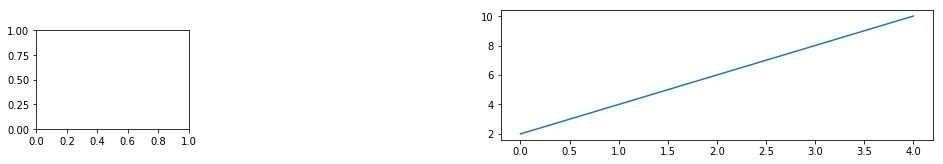

In [58]:
fig = plt.figure()

ax = fig.add_subplot(221)
dens_plot = spx.plots['density']

dens_plot.figure = fig
dens_plot.axes = ax

new_ax2 = fig.add_subplot(222)
new_ax2.plot(x, y)

new_ax3 = fig1.add_subplot(224)
new_ax3.plot(x, y)

new_ax2.set_position([1.2, 0.5, 1, 0.45])
new_ax3.set_position([1.2, 0, 1, 0.45])

spx.save()
fig.savefig('ftt.png')

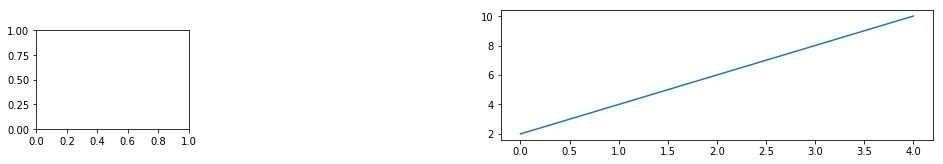

In [59]:
fig

In [60]:
spx
fig.add_subplot

<bound method Figure.add_subplot of <Figure size 432x288 with 2 Axes>>

In [61]:
slc = yt.SlicePlot(ds, 'x', 'density')
dens_plot = slc.plots['density']

fig = dens_plot.figure
ax = dens_plot.axes
#colorbar_axes = dens_plot.cax

new_ax2 = fig.add_subplot(212)
new_ax2.set_position([1.2, 0.5, 1, 0.45])
slc.save("his")

yt : [INFO     ] 2019-05-24 09:36:20,778 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:36:20,779 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:36:20,780 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:36:20,781 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-24 09:36:20,782 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-05-24 09:36:21,038 Saving plot his_Slice_x_density.png


['his_Slice_x_density.png']

In [62]:
rayray = yt.load("OHC.h5")

yt : [INFO     ] 2019-05-24 09:37:42,401 Parameters: current_time              = 0.0060000200028298 code_time
yt : [INFO     ] 2019-05-24 09:37:42,402 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-05-24 09:37:42,402 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-05-24 09:37:42,403 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-05-24 09:37:42,404 Parameters: cosmological_simulation   = 0.0


In [66]:
sgsg = tri.SpectrumGenerator()

yt : [INFO     ] 2019-05-24 09:38:33,979 No parameters specified, defaulting to COS instrument.
yt : [INFO     ] 2019-05-24 09:38:33,982 Setting instrument to COS


In [69]:
f =sgsg.make_spectrum(rayray, lines=line_list)

yt : [INFO     ] 2019-05-24 09:39:15,215 Creating spectrum
yt : [INFO     ] 2019-05-24 09:39:15,270 12 out of 118 line components will be deposited as unresolved lines.
Adding line - O VI 1038 [1037.613000 A]: : 100%|██████████| 118/118 [00:00<00:00, 3260.67it/s]
yt : [INFO     ] 2019-05-24 09:39:15,311 13 out of 118 line components will be deposited as unresolved lines.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 118/118 [00:00<00:00, 2241.30it/s]
yt : [INFO     ] 2019-05-24 09:39:17,199 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2019-05-24 09:39:17,201 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2019-05-24 09:39:17,204 Not adding continuum Ly C: insufficient column density or out of range


In [1]:
sgsg.plot_spectrum()

NameError: name 'sgsg' is not defined

In [72]:
sg.

array([0., 0., 0., ..., 0., 0., 0.])

In [3]:
rayray = yt.load("OHC.h5")

yt : [INFO     ] 2019-05-28 09:46:38,110 Parameters: current_time              = 0.0060000200028298 code_time
yt : [INFO     ] 2019-05-28 09:46:38,111 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-05-28 09:46:38,112 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-05-28 09:46:38,113 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-05-28 09:46:38,114 Parameters: cosmological_simulation   = 0.0


In [4]:
rrr =rayray.all_data()

In [8]:
rrr['Hp0_number_density']

YTFieldNotFound: Could not find field '('all', 'Hp0_number_density')' in OHC.h5.

In [11]:
rayray._write_light_ray


AttributeError: 'YTDataLightRayDataset' object has no attribute '_write_light_ray'